In [1]:
from algoshort.yfinance_handler import YFinanceDataHandler
handler = YFinanceDataHandler(cache_dir="./cache")
symbols = handler.list_cached_symbols()
handler.download_data(symbols, use_cache=True)
df = handler.get_ohlc_data('A2A.MI')

2025-09-16 09:37:05,983 - algoshort.yfinance_handler.YFinanceDataHandler - INFO - Cache hits: 10, Downloads needed: 0
2025-09-16 09:37:05,983 - algoshort.yfinance_handler.YFinanceDataHandler - INFO - Successfully processed 10/10 symbols


In [2]:
df

Price,date,open,high,low,close
0,2016-01-04,0.776806,0.780559,0.763046,0.765548
1,2016-01-05,0.771802,0.777431,0.761169,0.774304
2,2016-01-06,0.770551,0.781184,0.766173,0.769300
3,2016-01-07,0.759919,0.779308,0.747410,0.777431
4,2016-01-08,0.778057,0.786187,0.771177,0.772428
...,...,...,...,...,...
2461,2025-09-08,2.128000,2.131000,2.106000,2.106000
2462,2025-09-09,2.103000,2.114000,2.102000,2.112000
2463,2025-09-10,2.111000,2.117000,2.097000,2.117000
2464,2025-09-11,2.122000,2.149000,2.122000,2.131000


In [3]:
from algoshort.ohlcprocessor import OHLCProcessor
processor = OHLCProcessor()
df = processor.calculate_relative_prices(
    stock_data= df,
    benchmark_data= handler.get_data(symbol='FTSEMIB.MI')
    )
df

2025-09-16 09:37:06,020 - INFO - Merging primary data (shape: (2466, 5)) with benchmark data (shape: (2465, 6)).
2025-09-16 09:37:06,022 - INFO - Merge completed. New DataFrame shape: (2466, 6)
2025-09-16 09:37:06,022 - INFO - Rebasing benchmark to 1.0 using the first value: 20734.0
2025-09-16 09:37:06,022 - INFO - Calculating relative OHLC prices...
2025-09-16 09:37:06,022 - INFO - Relative price calculation complete.


Price,date,open,high,low,close,ropen,rhigh,rlow,rclose
0,2016-01-04,0.776806,0.780559,0.763046,0.765548,0.7768,0.7806,0.7630,0.7655
1,2016-01-05,0.771802,0.777431,0.761169,0.774304,0.7626,0.7682,0.7521,0.7651
2,2016-01-06,0.770551,0.781184,0.766173,0.769300,0.7823,0.7931,0.7779,0.7811
3,2016-01-07,0.759919,0.779308,0.747410,0.777431,0.7804,0.8003,0.7676,0.7984
4,2016-01-08,0.778057,0.786187,0.771177,0.772428,0.8119,0.8204,0.8048,0.8061
...,...,...,...,...,...,...,...,...,...
2461,2025-09-08,2.128000,2.131000,2.106000,2.106000,1.0575,1.0590,1.0465,1.0465
2462,2025-09-09,2.103000,2.114000,2.102000,2.112000,1.0380,1.0434,1.0375,1.0424
2463,2025-09-10,2.111000,2.117000,2.097000,2.117000,1.0406,1.0436,1.0337,1.0436
2464,2025-09-11,2.122000,2.149000,2.122000,2.131000,1.0369,1.0501,1.0369,1.0413


In [4]:
from algoshort.regime_fc import Regime_fc

regime_fc = Regime_fc()
df = regime_fc.historical_swings(df, relative = True, dist= None, hurdle= None)
df

2025-09-16 09:37:06,443 - algoshort.regime_fc.Regime_fc - INFO - Initialized regime_fc swing analyzer
2025-09-16 09:37:06,443 - INFO - Initialized regime_fc swing analyzer
2025-09-16 09:37:06,443 - algoshort.regime_fc.Regime_fc - INFO - Starting historical_swings analysis
2025-09-16 09:37:06,443 - INFO - Starting historical_swings analysis
2025-09-16 09:37:06,463 - algoshort.regime_fc.Regime_fc - INFO - historical_swings completed with 4 swing levels
2025-09-16 09:37:06,463 - INFO - historical_swings completed with 4 swing levels


Price,date,open,high,low,close,ropen,rhigh,rlow,rclose,rh1,rl1,rh2,rl2,rh3,rl3,rh4,rl4
0,2016-01-04,0.776806,0.780559,0.763046,0.765548,0.7768,0.7806,0.7630,0.7655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-05,0.771802,0.777431,0.761169,0.774304,0.7626,0.7682,0.7521,0.7651,NaN,0.7521,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-06,0.770551,0.781184,0.766173,0.769300,0.7823,0.7931,0.7779,0.7811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-07,0.759919,0.779308,0.747410,0.777431,0.7804,0.8003,0.7676,0.7984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-08,0.778057,0.786187,0.771177,0.772428,0.8119,0.8204,0.8048,0.8061,0.8204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,2025-09-08,2.128000,2.131000,2.106000,2.106000,1.0575,1.0590,1.0465,1.0465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2462,2025-09-09,2.103000,2.114000,2.102000,2.112000,1.0380,1.0434,1.0375,1.0424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2463,2025-09-10,2.111000,2.117000,2.097000,2.117000,1.0406,1.0436,1.0337,1.0436,NaN,1.0337,NaN,NaN,NaN,NaN,NaN,NaN
2464,2025-09-11,2.122000,2.149000,2.122000,2.131000,1.0369,1.0501,1.0369,1.0413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.describe()

Price,date,open,high,low,close,ropen,rhigh,rlow,rclose,rh1,rl1,rh2,rl2,rh3,rl3,rh4,rl4
count,2466,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,397.000000,398.000000,81.000000,81.000000,16.000000,15.000000,4.000000,5.000000
mean,2020-11-05 18:07:17.956204544,1.252920,1.265294,1.239803,1.252619,1.041094,1.051652,1.029855,1.040751,1.063564,1.013858,1.092216,0.989111,1.175031,0.939713,1.265250,0.881080
min,2016-01-04 00:00:00,0.600429,0.612313,0.586357,0.597928,0.719500,0.742200,0.713400,0.734000,0.753400,0.713400,0.782400,0.713400,1.005100,0.807500,1.218400,0.807500
25%,2018-06-04 06:00:00,0.972313,0.982313,0.961926,0.972313,0.948600,0.958550,0.938900,0.949325,0.967600,0.926525,1.002400,0.912000,1.079675,0.872400,1.261975,0.856800
50%,2020-11-07 12:00:00,1.119044,1.128296,1.108042,1.119003,1.045000,1.055650,1.032950,1.043550,1.069900,1.015500,1.094300,0.989600,1.189400,0.943100,1.279600,0.885900
75%,2023-04-05 18:00:00,1.487814,1.501492,1.474187,1.489588,1.133675,1.143275,1.122200,1.132450,1.157300,1.111675,1.194100,1.071700,1.277600,0.991600,1.282875,0.889600
max,2025-09-12 00:00:00,2.353000,2.386000,2.339000,2.361000,1.333700,1.338900,1.269500,1.278500,1.338900,1.246500,1.338900,1.220900,1.338900,1.076600,1.283400,0.965600
std,NaN,0.403304,0.405799,0.400690,0.403332,0.115654,0.115915,0.115144,0.115288,0.118669,0.115126,0.125412,0.109878,0.106524,0.086043,0.031387,0.057539


In [6]:
# rhs = ['hi1', 'lo1','hi2', 'lo2', 'hi3', 'lo3']
# rrhs = ['rh1', 'rl1','rh2', 'rl2', 'rh3', 'rl3']
# rt_hi,rt_lo,_hi,_lo,shi,slo = [rhs[h] for h in range(len(rhs))]
# rt_hi,rt_lo,_hi,_lo,shi,slo = [rrhs[h] for h in range(len(rrhs))]
# rt_hi,rt_lo,_hi,_lo,shi,slo

In [7]:
# de = regime_fc.cleanup_latest_swing(df, shi, slo, rt_hi, rt_lo)
# df.describe()

In [8]:
# ud, bs, bs_dt, _rt, _swg, hh_ll, hh_ll_dt = regime_fc.latest_swing_variables(df,shi,slo,rt_hi,rt_lo,'rhigh','rlow', 'rclose')

In [9]:
df = regime_fc.swings(df, rel=True, config_path='./config.json')
df

2025-09-16 09:37:06,587 - algoshort.regime_fc.Regime_fc - INFO - Starting swings analysis (rel=True)
2025-09-16 09:37:06,587 - INFO - Starting swings analysis (rel=True)
2025-09-16 09:37:06,590 - algoshort.regime_fc.Regime_fc - INFO - Starting historical_swings analysis
2025-09-16 09:37:06,590 - INFO - Starting historical_swings analysis
2025-09-16 09:37:06,611 - algoshort.regime_fc.Regime_fc - INFO - historical_swings completed with 4 swing levels
2025-09-16 09:37:06,611 - INFO - historical_swings completed with 4 swing levels
2025-09-16 09:37:06,625 - algoshort.regime_fc.Regime_fc - INFO - Completed swings analysis
2025-09-16 09:37:06,625 - INFO - Completed swings analysis


Price,date,open,high,low,close,ropen,rhigh,rlow,rclose,rh1,rl1,rh2,rl2,rh3,rl3,rh4,rl4,rrt
0,2016-01-04,0.776806,0.780559,0.763046,0.765548,0.7768,0.7806,0.7630,0.7655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-05,0.771802,0.777431,0.761169,0.774304,0.7626,0.7682,0.7521,0.7651,NaN,0.7521,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-06,0.770551,0.781184,0.766173,0.769300,0.7823,0.7931,0.7779,0.7811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-07,0.759919,0.779308,0.747410,0.777431,0.7804,0.8003,0.7676,0.7984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-08,0.778057,0.786187,0.771177,0.772428,0.8119,0.8204,0.8048,0.8061,0.8204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,2025-09-08,2.128000,2.131000,2.106000,2.106000,1.0575,1.0590,1.0465,1.0465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2462,2025-09-09,2.103000,2.114000,2.102000,2.112000,1.0380,1.0434,1.0375,1.0424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2463,2025-09-10,2.111000,2.117000,2.097000,2.117000,1.0406,1.0436,1.0337,1.0436,NaN,1.0337,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2464,2025-09-11,2.122000,2.149000,2.122000,2.131000,1.0369,1.0501,1.0369,1.0413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.describe()

Price,date,open,high,low,close,ropen,rhigh,rlow,rclose,rh1,rl1,rh2,rl2,rh3,rl3,rh4,rl4,rrt
count,2466,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,397.000000,398.000000,81.000000,81.000000,16.000000,16.000000,4.000000,5.000000,1.0000
mean,2020-11-05 18:07:17.956204544,1.252920,1.265294,1.239803,1.252619,1.041094,1.051652,1.029855,1.040751,1.063564,1.013858,1.092216,0.989111,1.175031,0.945206,1.265250,0.881080,1.0634
min,2016-01-04 00:00:00,0.600429,0.612313,0.586357,0.597928,0.719500,0.742200,0.713400,0.734000,0.753400,0.713400,0.782400,0.713400,1.005100,0.807500,1.218400,0.807500,1.0634
25%,2018-06-04 06:00:00,0.972313,0.982313,0.961926,0.972313,0.948600,0.958550,0.938900,0.949325,0.967600,0.926525,1.002400,0.912000,1.079675,0.879150,1.261975,0.856800,1.0634
50%,2020-11-07 12:00:00,1.119044,1.128296,1.108042,1.119003,1.045000,1.055650,1.032950,1.043550,1.069900,1.015500,1.094300,0.989600,1.189400,0.952600,1.279600,0.885900,1.0634
75%,2023-04-05 18:00:00,1.487814,1.501492,1.474187,1.489588,1.133675,1.143275,1.122200,1.132450,1.157300,1.111675,1.194100,1.071700,1.277600,1.017250,1.282875,0.889600,1.0634
max,2025-09-12 00:00:00,2.353000,2.386000,2.339000,2.361000,1.333700,1.338900,1.269500,1.278500,1.338900,1.246500,1.338900,1.220900,1.338900,1.076600,1.283400,0.965600,1.0634
std,NaN,0.403304,0.405799,0.400690,0.403332,0.115654,0.115915,0.115144,0.115288,0.118669,0.115126,0.125412,0.109878,0.106524,0.085980,0.031387,0.057539,NaN


In [11]:
df = regime_fc.regime(df, rel=True, config_path='./config.json')

2025-09-16 09:37:06,664 - algoshort.regime_fc.Regime_fc - INFO - Starting regime analysis (rel=True)
2025-09-16 09:37:06,664 - INFO - Starting regime analysis (rel=True)
2025-09-16 09:37:06,667 - algoshort.regime_fc.Regime_fc - INFO - Starting regime_floor_ceiling analysis
2025-09-16 09:37:06,667 - INFO - Starting regime_floor_ceiling analysis
2025-09-16 09:37:06,680 - algoshort.regime_fc.Regime_fc - INFO - regime_floor_ceiling completed
2025-09-16 09:37:06,680 - INFO - regime_floor_ceiling completed
2025-09-16 09:37:06,682 - algoshort.regime_fc.Regime_fc - INFO - Completed regime analysis
2025-09-16 09:37:06,682 - INFO - Completed regime analysis


In [13]:
ticker = 'A2A.MI'
bm_name = 'FTSEMIB.MI'

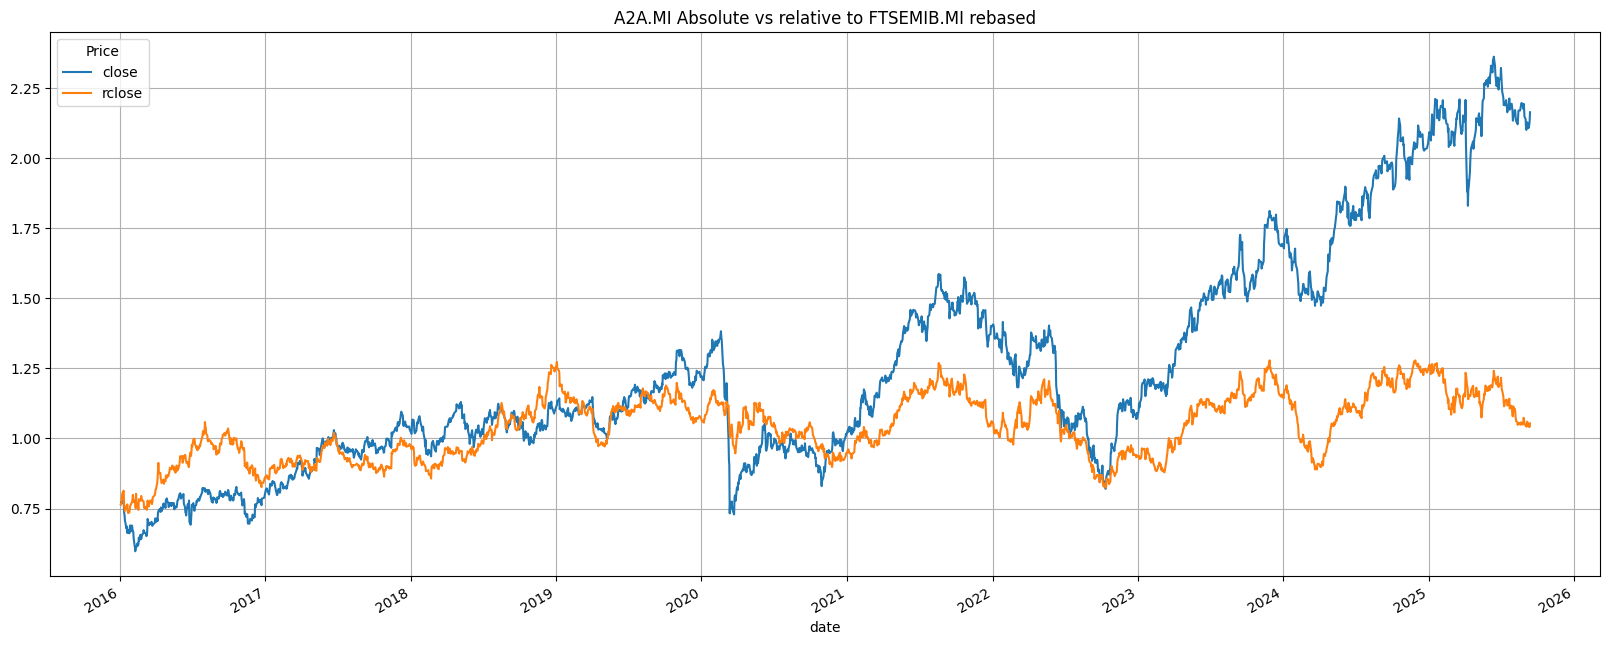

In [14]:
from algoshort.plots import *

plot_abs_rel(df=df, ticker=ticker, bm_name=bm_name)

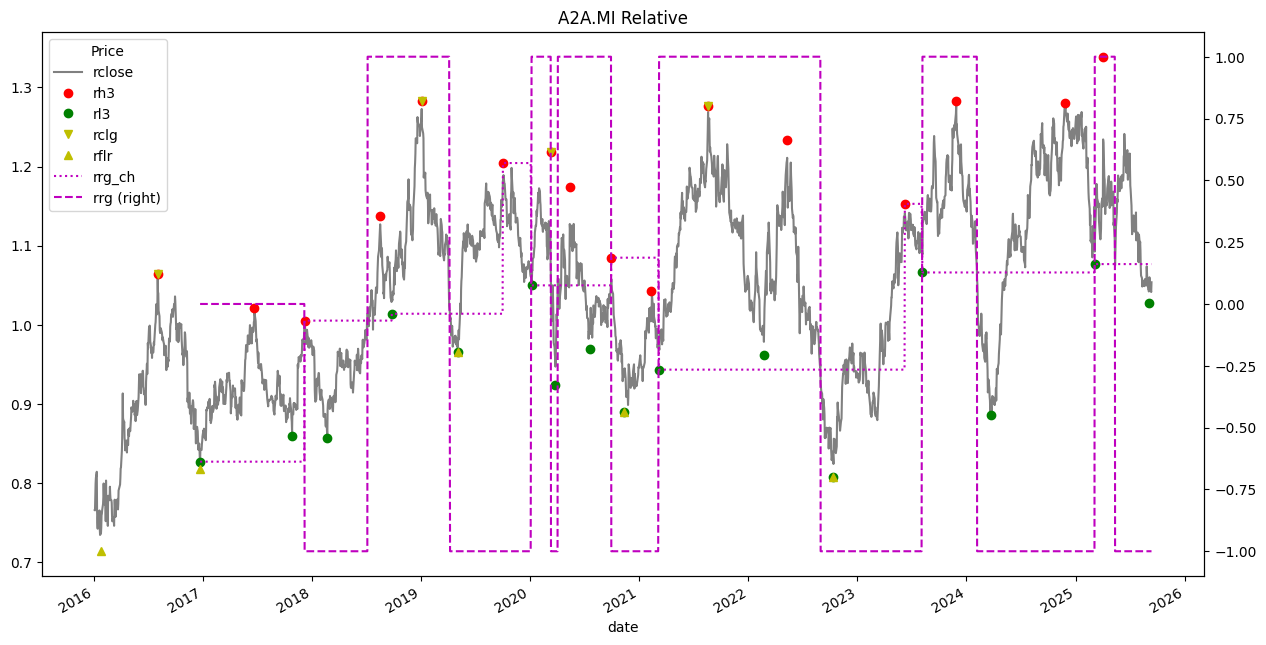

In [15]:
plot_signal_rel(df, ticker=ticker)

In [20]:
plot_regime_rel(df, ticker)

NameError: name 'graph_regime_combo' is not defined

In [ ]:

from algoshort.wrappers import calculate_relative_prices, generate_signals, calculate_metrics, calculate_return


In [ ]:
def TA(symbol, benchmark, cache_dir, config_path):

    handler = YFinanceDataHandler(cache_dir=cache_dir)
    symbols = [symbol, benchmark]
    handler.download_data(symbols=symbols)
    stock_data = handler.calculate_relative_prices(symbol=symbols[0], benchmark_symbol=symbols[1])
    stock_data, signal_columns = generate_signals(stock_data)
    stock_data = calculate_return(stock_data, config_path=config_path)
    stock_data = calculate_metrics(stock_data, config_path=config_path)
    return stock_data


ta = TA(symbol='FCT.MI', benchmark='FTSEMIB.MI', cache_dir = './cache', config_path='config.json')

In [ ]:
TA(symbol='FTC.MI', benchmark='FTSEMIB.MI', cache_dir = './cache', config_path='config.json')